## Introduction

New York City is one of the busiest urban areas in the world, with a transportation network that includes its iconic yellow and green taxis.

From two of the columns in this notebook, `lpep_pickup_datetime` and `lpep_dropoff_datetime`, in the context of NYC taxi data, LPEP stands for Livery Passenger Enhancement Program. It refers specifically to data collected from the green taxis, also known as Boro Taxis, which are part of the livery service authorized to pick up street-hail passengers in the outer boroughs and upper Manhattan. 
This notebook focuses on analyzing trip data from New York's green taxis, which primarily serve areas outside Manhattan, including the outer boroughs.

>Green taxis, also known as boro taxis and street-hail liveries, were introduced in August of 2013 to
>improve taxi service and availability in the boroughs. Green taxis may respond to street hails,
>but only in the areas indicated in green on the map (i.e. above W 110 St/E 96th St in Manhattan and in the boroughs).
>
>Source: [Trip Record User Guide](https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf)

With an increase of ride-hailing apps like Uber and Lyft, the TLC has rolled out a new pilot program to phase out green taxis, called the SHL pilot program.


> **Street Hail Livery (SHL) Pilot Program**
> 
>The SHL Pilot Program utilizes returned SHL (Green Taxi) permits to test the feasibility of a license that cuts costs traditionally associated with SHLs, while also eliminating the ability to receive street hails. Over a period lasting no longer than two years, it will study potential improvements in pre arranged non-emergency medical transportation service, outer-borough service, fleet electrification, and wheelchair accessibility of the TLC fleet.
>
> ...
> 
> Operating Restrictions:
> 
> - The vehicle must be an Electric Vehicle (EV), a hybrid electric vehicle, or a Wheelchair Accessible Vehicle (WAV).
> - Unlike traditional SHLs, SHL Pilot Program participants may not accept street hails.
> - Similar to traditional SHLs, SHL Pilot Program participants may only accept trips beginning outside the Pre-Arranged Exclusionary Zone unless it is an Access A Ride or Medicaid-reimbursed trip.
>
> Source: [Street Hail Livery (SHL) Pilot Program](https://www.nyc.gov/site/tlc/about/shl-pilot-program.page)

## Problem Statement


In [1]:
# import modules

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import missingno as msno
# import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning

In [2]:
# read data

df = pd.read_csv('NYC TLC Trip Record.csv')

In [3]:
df

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1             2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2             2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                NaN   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                NaN   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                NaN   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                NaN   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0             1.0           166           143              1.0           2.58   
1             1.0            24            43              1.0           1.81   
2             1.0           223           179              1.0           0.00   
3             1.0            41           238              1.0           1.30   
4             1.0            41            74              1.0           1.10   
...           ...           ...           ...              ...            ...   
68206         NaN            49            62              NaN        4070.82   
68207         NaN            10           205              NaN           2.14   
68208         NaN            66            37              NaN           3.44   
68209         NaN           225           189              NaN           3.03   
68210         NaN           256           140              NaN           5.82   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0            14.90    1.0      0.5        4.03           0.0        NaN   
1            10.70    1.0      0.5        2.64           0.0        NaN   
2             7.20    1.0      0.5        1.94           0.0        NaN   
3             6.50    0.5      1.5        1.70           0.0        NaN   
4             6.00    0.5      1.5        0.00           0.0        NaN   
...            ...    ...      ...         ...           ...        ...   
68206        15.70    0.0      0.0        0.00           0.0        NaN   
68207         4.41    0.0      0.0        0.00           0.0        NaN   
68208        16.53    0.0      0.0        3.51           0.0        NaN   
68209        14.98    0.0      0.0        3.20           0.0        NaN   
68210        23.65    0.0      0.0        2.00           0.0        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
0                        1.0         24.18           1.0        1.0   
1                        1.0         15.84           1.0        1.0   
2                        1.0         11.64           1.0        1.0   
3                        1.0         10.20           1.0        1.0   
4                        1.0          8.00           1.0        1.0   
...                      ...           ...           ...        ...   
68206                    1.0         16.70           NaN        NaN   
68207                    1.0          5.41           NaN        NaN   
68208                    1.0         21.04           NaN        NaN   
68209                    1.0         19.18           NaN        NaN   
68210                    1.0         29.40           NaN        NaN   

       congestion_surcharge  
0                      2.75  
1                      0.00  
2                      0.00  
3                      0.00  
4                      0.00  
...                     ...  
68206                   NaN  
68207                   NaN  
68208                   NaN  
68209  

In [4]:
# checking the overview of the data
display(df.info(), df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

None

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

## Joining Taxi Zone Lookup and Taxi Zone Geography
In the [TLC Trip Record Data](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) page, there are supporting data files which we could use for analysis, namely:
- `taxi_zone_lookup.csv` which contains more information which directly refers to the `PULocationID` and `DOLocationID` columns in our dataset. 
- `taxi_zones.shp` contains geographical data which allow us to visualize a map

In [5]:
taxi_zones = pd.read_csv('taxi_zone_lookup.csv')
taxi_zones.head()

LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone

In [6]:
# join for PULocationID
df = pd.merge(df, taxi_zones, how="left", left_on="PULocationID", right_on="LocationID")
df = df.drop(columns=["LocationID"])
df = df.rename(columns={"Borough": "PU_Borough", "Zone": "PU_Zone", "service_zone": "PU_service_zone"})

# join for DOLocationID
df = pd.merge(df, taxi_zones, how="left", left_on="DOLocationID", right_on="LocationID")
df = df.drop(columns=["LocationID"])
df = df.rename(columns={"Borough": "DO_Borough", "Zone": "DO_Zone", "service_zone": "DO_service_zone"})

df.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           166           143              1.0           2.58   
1         1.0            24            43              1.0           1.81   
2         1.0           223           179              1.0           0.00   
3         1.0            41           238              1.0           1.30   
4         1.0            41            74              1.0           1.10   

   fare_amount  ...  total_amount  payment_type  trip_type  \
0         14.9  ...         24.18           1.0        1.0   
1         10.7  ...         15.84           1.0        1.0   
2          7.2  ...         11.64           1.0        1.0   
3          6.5  ...         10.20           1.0        1.0   
4          6.0  ...          8.00           1.0        1.0   

   congestion_surcharge  PU_Borough              PU_Zone  PU_service_zone  \
0                  2.75   Manhattan  Morningside Heights        Boro Zone   
1                  0.00   Manhattan         Bloomingdale      Yellow Zone   
2                  0.00      Queens             Steinway        Boro Zone   
3                  0.00   Manhattan       Central Harlem        Boro Zone   
4                  0.00   Manhattan       Central Harlem        Boro Zone   

   DO_Borough                DO_Zone  DO_service_zone  
0   Manhattan    Lincoln Square West      Yellow Zone  
1   Manhattan           Central Park      Yellow Zone  
2      Queens            Old Astoria        Boro Zone  
3   Manhattan  Upper West Side North      Yellow Zone  
4   Manhattan      East Harlem North        Boro Zone  

[5 rows x 26 columns]

## Missing values and Outliers handling
Here we see that the columns containing missing values have the exact number of rows with missing values, so we want to find if there is a strong correlation between the columns with missing values. From the heatmap below, it is known that the column with missing values have missing values in the same rows. This makes it more convenient to drop the missing values from these columns.

Columns with missing values:
- `payment_type`             
- `trip_type`            
- `congestion_surcharge` 
- `passenger_count`  
- `store_and_fwd_flag`    
- `RatecodeID`

There are also missing values from the columns which we joined from the taxi zone lookup data, we are going to leave this as is for now, as we do not need all the columns in the analysis.

<Axes: >

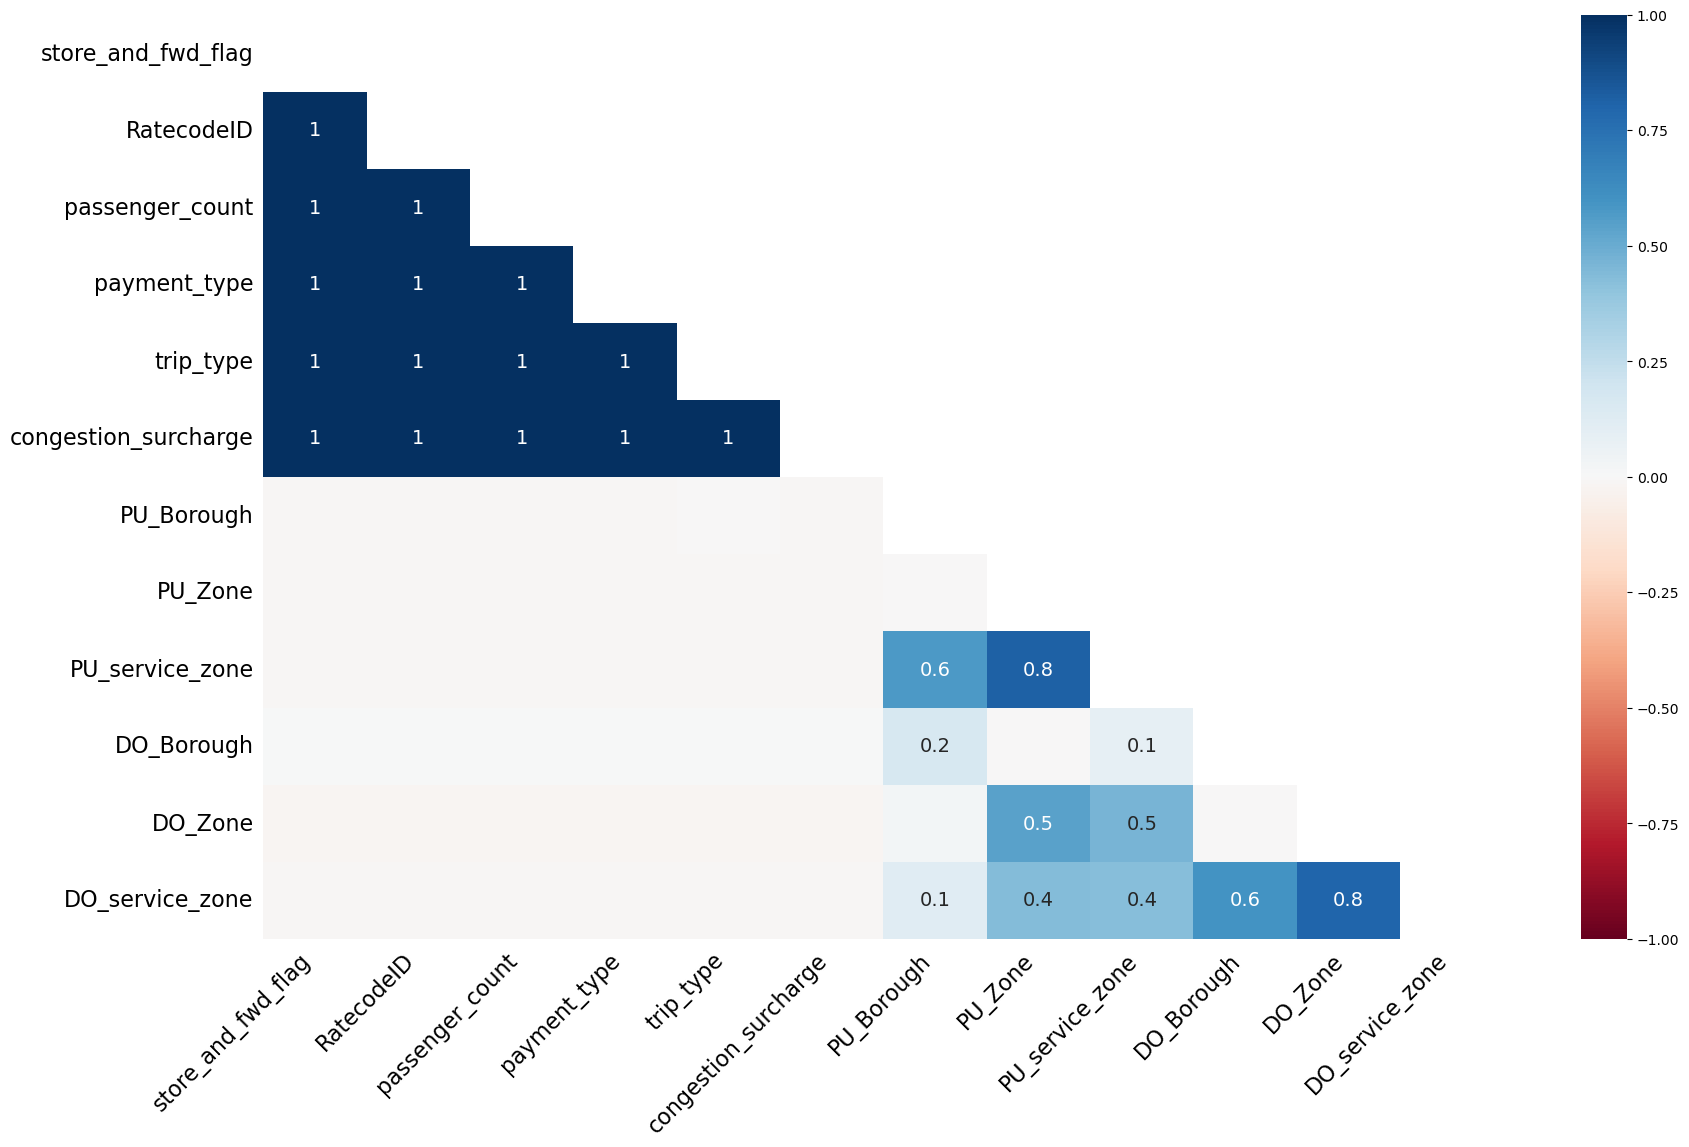

In [7]:
msno.heatmap(df)

In [8]:
# Drop rows with missing values
df = df.dropna(subset="RatecodeID")
df = df.dropna(subset="trip_type")

<Axes: >

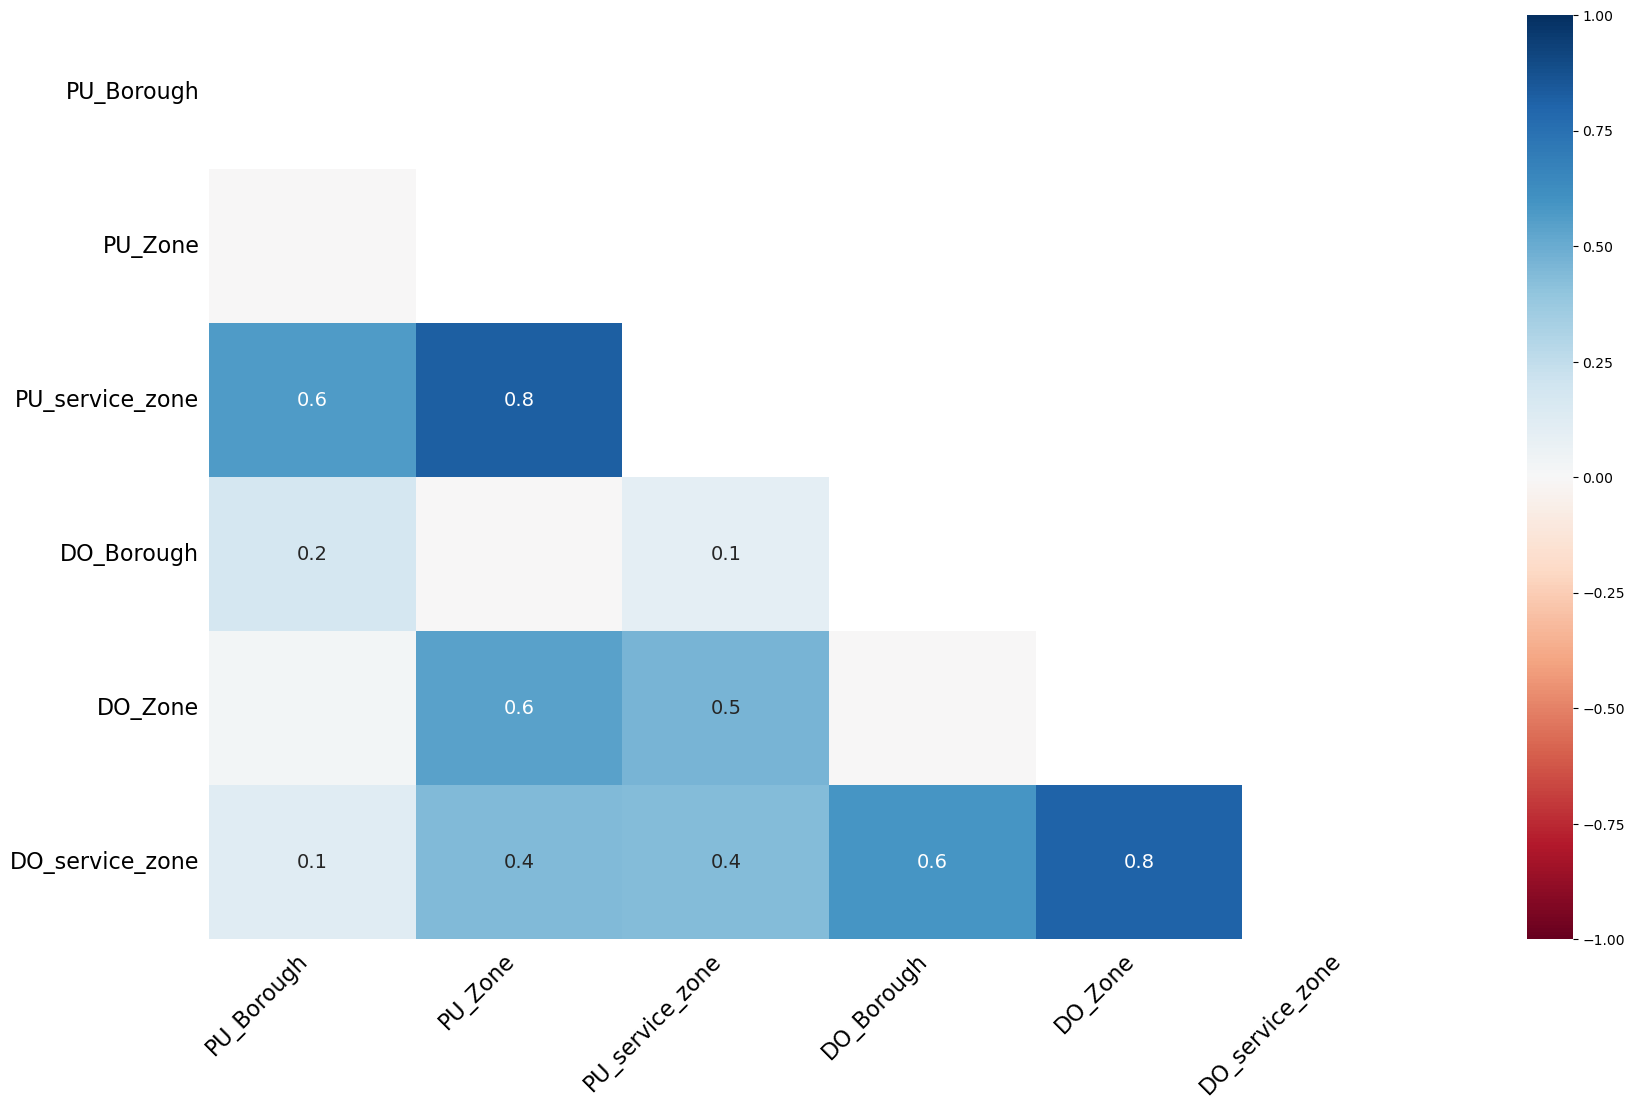

In [9]:
msno.heatmap(df)

### 1. `ehail_fee`
+ We see form `df.info()` that the column contains 0 non-null values, giving us no information. Hence, we are able to drop the column.

In [10]:
df = df.drop(columns=['ehail_fee'])
df.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           166           143              1.0           2.58   
1         1.0            24            43              1.0           1.81   
2         1.0           223           179              1.0           0.00   
3         1.0            41           238              1.0           1.30   
4         1.0            41            74              1.0           1.10   

   fare_amount  ...  total_amount  payment_type  trip_type  \
0         14.9  ...         24.18           1.0        1.0   
1         10.7  ...         15.84           1.0        1.0   
2          7.2  ...         11.64           1.0        1.0   
3          6.5  ...         10.20           1.0        1.0   
4          6.0  ...          8.00           1.0        1.0   

   congestion_surcharge  PU_Borough              PU_Zone  PU_service_zone  \
0                  2.75   Manhattan  Morningside Heights        Boro Zone   
1                  0.00   Manhattan         Bloomingdale      Yellow Zone   
2                  0.00      Queens             Steinway        Boro Zone   
3                  0.00   Manhattan       Central Harlem        Boro Zone   
4                  0.00   Manhattan       Central Harlem        Boro Zone   

   DO_Borough                DO_Zone DO_service_zone  
0   Manhattan    Lincoln Square West     Yellow Zone  
1   Manhattan           Central Park     Yellow Zone  
2      Queens            Old Astoria       Boro Zone  
3   Manhattan  Upper West Side North     Yellow Zone  
4   Manhattan      East Harlem North       Boro Zone  

[5 rows x 25 columns]

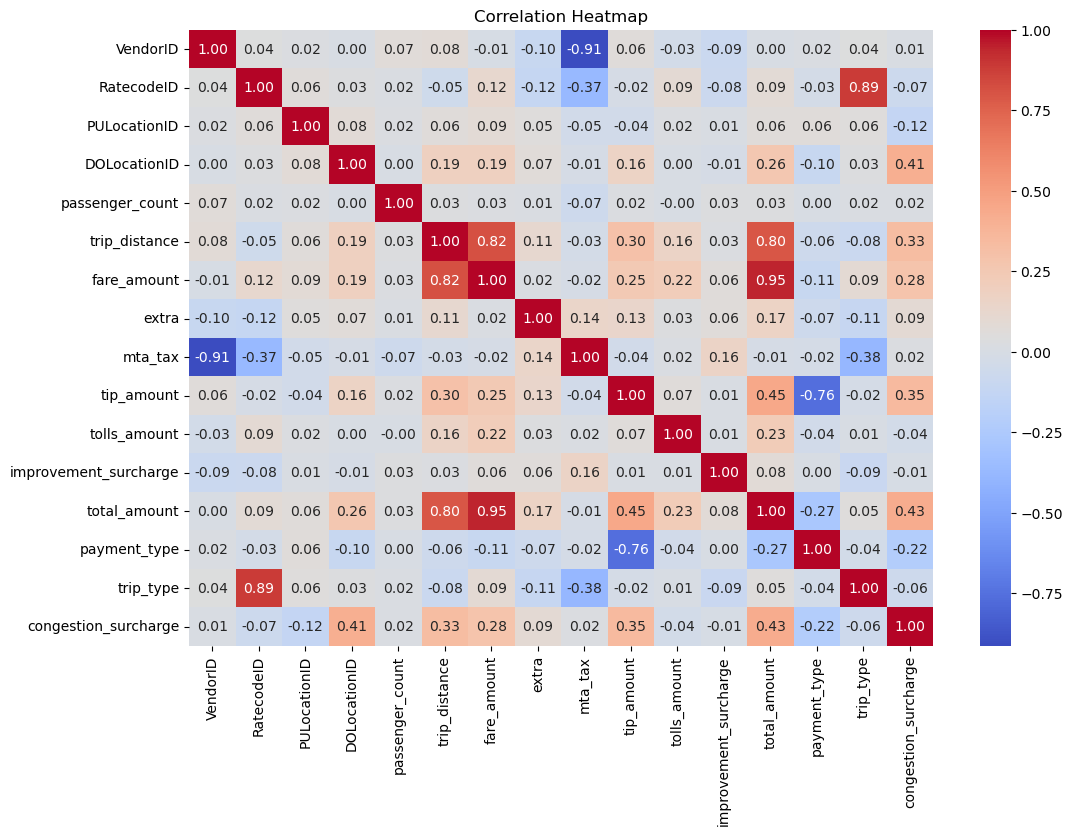

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr(method='spearman', numeric_only=True)

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

plt.title('Correlation Heatmap')
plt.show()

### 1. `congestion_surcharge`
+ Get absolute value, since a negative surcharge should be read as an error

In [12]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
 0.00    46986
 2.75    16872
 2.50       16
-2.75        3
Name: count, dtype: int64

In [13]:
df['congestion_surcharge'] = abs(df['congestion_surcharge'])

In [14]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
0.00    46986
2.75    16875
2.50       16
Name: count, dtype: int64

### 2. `RatecodeID`
    The final rate code in effect at the end of the trip.
    - 1 = Standard rate
    - 2 = JFK
    - 3 = Newark
    - 4 = Nassau or Westchester
    - 5 = Negotiated fare
    - 6 = Group ride
- Outliers with `RatecodeID == 99` can be replaced with `1` as they are not airport or outside NYC trips.

In [15]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    62103
5.0     1529
2.0      158
4.0       57
3.0       30
Name: count, dtype: int64

In [16]:
df[df['RatecodeID']==99]

Empty DataFrame
Columns: [VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge, PU_Borough, PU_Zone, PU_service_zone, DO_Borough, DO_Zone, DO_service_zone]
Index: []

[0 rows x 25 columns]

In [17]:
df['RatecodeID'] = df['RatecodeID'].replace(to_replace=99, value=1)

df['RatecodeID'].value_counts()

RatecodeID
1.0    62103
5.0     1529
2.0      158
4.0       57
3.0       30
Name: count, dtype: int64

In [18]:
df[df['RatecodeID']==5]

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
16            1  2023-01-01 00:10:45   2023-01-01 00:19:37                  N   
32            2  2023-01-01 00:40:58   2023-01-01 01:04:32                  N   
43            2  2023-01-01 00:16:10   2023-01-01 00:54:55                  N   
55            2  2023-01-01 00:39:52   2023-01-01 00:48:54                  N   
98            2  2023-01-01 00:57:51   2023-01-01 01:07:05                  N   
...         ...                  ...                   ...                ...   
63833         2  2023-01-31 22:43:19   2023-01-31 22:46:09                  N   
63838         2  2023-01-31 22:40:51   2023-01-31 22:41:02                  N   
63868         2  2023-01-31 23:44:44   2023-01-31 23:45:15                  N   
63869         2  2023-01-31 23:44:44   2023-01-31 23:45:15                  N   
63882         2  2023-01-31 23:09:22   2023-01-31 23:17:21                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
16            5.0            83           129              1.0           1.30   
32            5.0            66           164              4.0           6.78   
43            5.0            66            48              3.0           6.19   
55            5.0           129           226              1.0           2.08   
98            5.0           260            74              2.0           5.34   
...           ...           ...           ...              ...            ...   
63833         5.0           130           130              1.0           0.00   
63838         5.0            95            95              1.0           0.08   
63868         5.0           264           264              1.0           0.00   
63869         5.0           264           264              1.0           0.00   
63882         5.0           130           205              1.0           2.75   

       fare_amount  ...  total_amount  payment_type  trip_type  \
16            15.0  ...         15.00           1.0        2.0   
32            60.0  ...         75.66           1.0        2.0   
43            75.0  ...         78.05           2.0        2.0   
55            15.0  ...         16.00           1.0        2.0   
98            52.0  ...         59.55           1.0        2.0   
...            ...  ...           ...           ...        ...   
63833         10.0  ...         11.00           2.0        2.0   
63838         55.0  ...         60.00           1.0        2.0   
63868        -10.0  ...        -11.00           4.0        2.0   
63869         10.0  ...         11.00           4.0        2.0   
63882         15.0  ...         17.30           1.0        2.0   

       congestion_surcharge  PU_Borough             PU_Zone  PU_service_zone  \
16                     0.00      Queens    Elmhurst/Maspeth        Boro Zone   
32                     2.75    Brooklyn  DUMBO/Vinegar Hill        Boro Zone   
43                     2.75    Brooklyn  DUMBO/Vinegar Hill        Boro Zone   
55                     0.00      Queens     Jackson Heights        Boro Zone   
98                     0.00      Queens            Woodside        Boro Zone   
...                     ...         ...                 ...              ...   
63833                  0.00      Queens             Jamaica        Boro Zone   
63838                  0.00      Queens        Forest Hills        Boro Zone   
63868                  0.00     Unknown                 NaN              NaN   
63869                  0.00     Unknown                 NaN              NaN   
63882                  0.00      Queens             Jamaica        Boro Zone   

       DO_Borough            DO_Zone DO_service_zone  
16         Queens    Jackson Heights       Boro Zone  
32      Manhattan      Midtown South     Yellow Zone  
43      Manhattan       Clinton East     Yellow Zone  
55         Queens          Sunnyside       Boro Zone  
98      Manhattan  East Harlem N

### 3. `payment_type`
+ Impute Missing Values:
    - input `1` (credit card) for rows which have a `tip_amount` > 0, since `tip_amount` only records credit card tips
    - input `5` (Unknown) for other missing value rows

In [19]:
df['payment_type'].value_counts()

payment_type
1.0    40676
2.0    22632
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64

In [20]:
credit_card_tips = (df['payment_type'].isna() & df['tip_amount']>0)
len(df[credit_card_tips])

0

In [21]:
# input 1 (credit card) for rows which have a tip_amount >0
df['payment_type'] = np.where(credit_card_tips, 1, df['payment_type'])

In [22]:
# input 5 (Unknown) for other missing value rows
df['payment_type'] = np.where(df['payment_type'].isna(), 5, df['payment_type'])

In [23]:
df['payment_type'].value_counts()

payment_type
1.0    40676
2.0    22632
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64

In [24]:
df['payment_type'].isna().sum()

0

### 4. `trip_type`
+ Get absolute value, since a negative surcharge should be read as an error
+ Impute Missing Values:
    - input `1` (credit card) for rows which have a `tip_amount` > 0, since `tip_amount` only records credit card tips
    - input `5` (Unknown) for other missing value rows

In [25]:
df['trip_type'].value_counts()

trip_type
1.0    62476
2.0     1401
Name: count, dtype: int64

In [26]:
df['calc_amount'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge'] + df['congestion_surcharge']

In [27]:
df['diff_amount'] = round(df['total_amount'] - df['calc_amount'], 5)

In [28]:
df

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1             2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2             2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...         ...                  ...                   ...                ...   
63882         2  2023-01-31 23:09:22   2023-01-31 23:17:21                  N   
63883         2  2023-01-31 23:06:18   2023-01-31 23:17:03                  N   
63884         2  2023-01-31 23:17:03   2023-01-31 23:23:04                  N   
63885         2  2023-01-31 23:29:18   2023-01-31 23:38:50                  N   
63886         2  2023-01-31 23:00:12   2023-01-31 23:10:08                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0             1.0           166           143              1.0           2.58   
1             1.0            24            43              1.0           1.81   
2             1.0           223           179              1.0           0.00   
3             1.0            41           238              1.0           1.30   
4             1.0            41            74              1.0           1.10   
...           ...           ...           ...              ...            ...   
63882         5.0           130           205              1.0           2.75   
63883         1.0            65           181              1.0           2.44   
63884         1.0           244           116              1.0           1.40   
63885         1.0            74           238              1.0           2.47   
63886         1.0            95            95              1.0           1.39   

       fare_amount  ...  trip_type  congestion_surcharge  PU_Borough  \
0             14.9  ...        1.0                  2.75   Manhattan   
1             10.7  ...        1.0                  0.00   Manhattan   
2              7.2  ...        1.0                  0.00      Queens   
3              6.5  ...        1.0                  0.00   Manhattan   
4              6.0  ...        1.0                  0.00   Manhattan   
...            ...  ...        ...                   ...         ...   
63882         15.0  ...        2.0                  0.00      Queens   
63883         13.5  ...        1.0                  0.00    Brooklyn   
63884          9.3  ...        1.0                  0.00   Manhattan   
63885         13.5  ...        1.0                  2.75   Manhattan   
63886         11.4  ...        1.0                  0.00      Queens   

                           PU_Zone  PU_service_zone  DO_Borough  \
0              Morningside Heights        Boro Zone   Manhattan   
1                     Bloomingdale      Yellow Zone   Manhattan   
2                         Steinway        Boro Zone      Queens   
3                   Central Harlem        Boro Zone   Manhattan   
4                   Central Harlem        Boro Zone   Manhattan   
...                            ...              ...         ...   
63882                      Jamaica        Boro Zone      Queens   
63883  Downtown Brooklyn/MetroTech        Boro Zone    Brooklyn   
63884     Washington Heights South        Boro Zone   Manhattan   
63885            East Harlem North        Boro Zone   Manhattan   
63886                 Forest Hills        Boro Zone      Queens   

                     DO_Zone  DO_service_zone  calc_amount diff_amount  
0        Lincoln Square West      Yellow Zone        24.18         0.0  
1               Central Park      Yellow Zone        15.84         0.0  
2                Old Astoria        Boro Zone        11.64         0.0  
3      Upper West Side North      Yellow Zone        11.20        -1.0  
4          East Harlem Nor

In [29]:
df['diff_amount'].value_counts()

diff_amount
 0.00    54775
-1.00     6750
-3.75     2330
-2.75       11
 1.95        7
-5.50        3
 1.25        1
Name: count, dtype: int64

In [30]:
df[df['diff_amount']==-1]['mta_tax'].value_counts()

mta_tax
1.5    6725
1.0      25
Name: count, dtype: int64

In [31]:
df['mta_tax'].value_counts()

mta_tax
 0.50    53040
 1.50     9055
 0.00     1591
-0.50      165
 1.00       25
 2.75        1
Name: count, dtype: int64

In [32]:
df.groupby('VendorID')['mta_tax'].value_counts()

VendorID  mta_tax
1          1.50       9055
           0.00         76
           0.50         48
           1.00         25
           2.75          1
2          0.50      52992
           0.00       1515
          -0.50        165
Name: count, dtype: int64

In [33]:
df.to_csv('taxi_data.csv')

## Map analysis

In [18]:
df[(df["PU_service_zone"]=="Boro Zone")& (df["PU_Borough"]=="Manhattan")]

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
5             2  2023-01-01 00:53:31   2023-01-01 01:11:04                  N   
8             2  2023-01-01 00:41:29   2023-01-01 00:46:26                  N   
...         ...                  ...                   ...                ...   
68198         2  2023-01-31 19:50:00   2023-01-31 20:03:00                NaN   
68201         2  2023-01-31 20:57:00   2023-01-31 21:17:00                NaN   
68203         2  2023-01-31 20:33:00   2023-01-31 20:52:00                NaN   
68204         2  2023-01-31 21:53:00   2023-01-31 22:05:00                NaN   
68205         2  2023-01-31 21:56:00   2023-01-31 22:14:00                NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0             1.0           166           143              1.0           2.58   
3             1.0            41           238              1.0           1.30   
4             1.0            41            74              1.0           1.10   
5             1.0            41           262              1.0           2.78   
8             1.0            41           166              2.0           1.11   
...           ...           ...           ...              ...            ...   
68198         NaN            42           243              NaN           4.40   
68201         NaN           166            68              NaN           6.92   
68203         NaN           166           141              NaN           3.31   
68204         NaN            42           236              NaN           2.26   
68205         NaN            75           186              NaN           3.92   

       fare_amount  ...  total_amount  payment_type  trip_type  \
0            14.90  ...         24.18           1.0        1.0   
3             6.50  ...         10.20           1.0        1.0   
4             6.00  ...          8.00           1.0        1.0   
5            17.70  ...         22.95           2.0        1.0   
8             7.20  ...         10.70           1.0        1.0   
...            ...  ...           ...           ...        ...   
68198        16.80  ...         21.36           NaN        NaN   
68201        27.74  ...         34.64           NaN        NaN   
68203        15.65  ...         23.28           NaN        NaN   
68204        14.62  ...         21.68           NaN        NaN   
68205        20.72  ...         25.02           NaN        NaN   

       congestion_surcharge  PU_Borough               PU_Zone  \
0                      2.75   Manhattan   Morningside Heights   
3                      0.00   Manhattan        Central Harlem   
4                      0.00   Manhattan        Central Harlem   
5                      2.75   Manhattan        Central Harlem   
8                      0.00   Manhattan        Central Harlem   
...                     ...         ...                   ...   
68198                   NaN   Manhattan  Central Harlem North   
68201                   NaN   Manhattan   Morningside Heights   
68203                   NaN   Manhattan   Morningside Heights   
68204                   NaN   Manhattan  Central Harlem North   
68205                   NaN   Manhattan     East Harlem South   

       PU_service_zone  DO_Borough                       DO_Zone  \
0            Boro Zone   Manhattan           Lincoln Square West   
3            Boro Zone   Manhattan         Upper West Side North   
4            Boro Zone   Manhattan             East Harlem North   
5            Boro Zone   Manhattan                Yorkville East   
8            Boro Zone   Manhattan           Morningside Heights   
...                ...         ...                           ...   
68198      

In [19]:
# Load the SHP file
taxi_path = "taxi_zones.shp"
gdf = gpd.read_file(taxi_path)
gdf = gdf.to_crs(epsg=3857)

In [20]:
gdf_PU = gdf.copy()

PU_zone_counts = df['PULocationID'].value_counts().reset_index()
PU_zone_counts.columns = ['PULocationID', 'count']

PU_zone_counts['PULocationID'] = PU_zone_counts['PULocationID'].astype(int)
gdf_PU['LocationID'] = gdf_PU['LocationID'].astype(int)

# Merge the data
gdf_PU = gdf_PU.merge(PU_zone_counts, left_on="LocationID", right_on="PULocationID")
gdf_PU = gdf_PU.drop(columns=["LocationID"])

# Replace NaN values (if any) with 0
gdf_PU['count'] = gdf_PU['count'].fillna(0)


In [21]:
PU_zone_counts

PULocationID  count
0              74  13257
1              75   9109
2              41   4058
3             166   3879
4              95   3839
..            ...    ...
221            46      1
222           161      1
223           143      1
224           214      1
225            58      1

[226 rows x 2 columns]

In [22]:
PU_zone_counts = PU_zone_counts.merge(df[["PULocationID", "PU_Zone", "PU_Borough", "PU_service_zone"]].drop_duplicates(subset=["PULocationID"]), how="left", on="PULocationID")


In [23]:
PU_zone_counts.sort_values(by="count", ascending=False).head(10)

PULocationID  count                   PU_Zone PU_Borough PU_service_zone
0            74  13257         East Harlem North  Manhattan       Boro Zone
1            75   9109         East Harlem South  Manhattan       Boro Zone
2            41   4058            Central Harlem  Manhattan       Boro Zone
3           166   3879       Morningside Heights  Manhattan       Boro Zone
4            95   3839              Forest Hills     Queens       Boro Zone
5            82   2927                  Elmhurst     Queens       Boro Zone
6            43   2868              Central Park  Manhattan     Yellow Zone
7            97   2195               Fort Greene   Brooklyn       Boro Zone
8             7   1965                   Astoria     Queens       Boro Zone
9           244   1804  Washington Heights South  Manhattan       Boro Zone

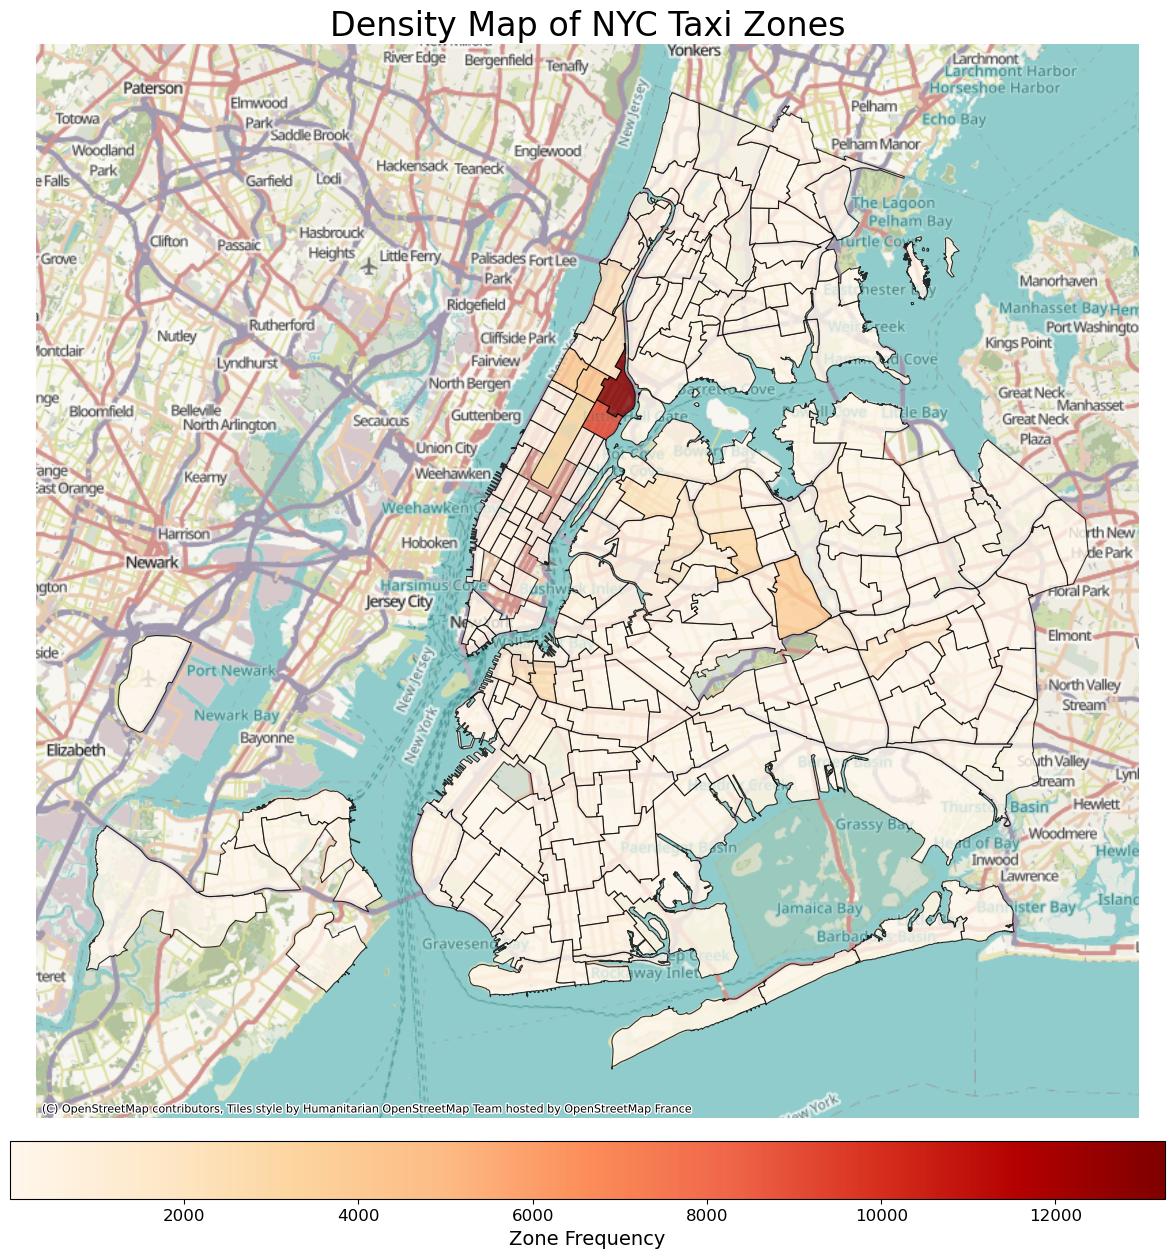

In [24]:
# Plot Pickup Density Map

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf_PU.plot(
    column='count',  # The column to use for coloring
    cmap='OrRd',     # Color map (e.g., OrRd, Blues, Viridis)
    linewidth=0.8,   # Line width for boundaries
    edgecolor='k',   # Boundary color
    alpha=0.8,       # Transparency
    ax=ax
)

# Add a basemap
ctx.add_basemap(
    ax,
    # CRS definition (without the line below, the map is incorrect)
    crs=gdf.crs.to_string(),
)


# Customize the plot
ax.set_axis_off()  # Remove axes
ax.set(title='Density Map of NYC Taxi Zones')
ax.title.set_size(24)

sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=gdf_PU['count'].min(), vmax=gdf_PU['count'].max()))
sm._A = []  # Empty array for the ScalarMappable
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.05, pad=0.02)
cbar.set_label('Zone Frequency', size=14)
cbar.ax.tick_params(labelsize=12)

plt.show()

In [25]:
gdf.sample(10)

OBJECTID  Shape_Leng  Shape_Area                               zone  \
230       231    0.063420    0.000167               TriBeCa/Civic Center   
18         19    0.101825    0.000547                          Bellerose   
119       120    0.083261    0.000093                    Highbridge Park   
76         77    0.075461    0.000192  East New York/Pennsylvania Avenue   
35         36    0.087051    0.000248                     Bushwick North   
195       196    0.083242    0.000197                          Rego Park   
42         43    0.099739    0.000380                       Central Park   
218       219    0.155127    0.000428          Springfield Gardens South   
123       124    0.127724    0.000755                       Howard Beach   
240       241    0.068765    0.000255              Van Cortlandt Village   

     LocationID    borough                                           geometry  
230         231  Manhattan  POLYGON ((-8238679.55 4971819.617, -8238604.54...  
18           19     Queens  POLYGON ((-8206850.898 4975593.534, -8206760.7...  
119         120  Manhattan  POLYGON ((-8229065.652 4991544.423, -8229051.6...  
76           77   Brooklyn  POLYGON ((-8226477.975 4964594.328, -8226433.1...  
35           36   Brooklyn  POLYGON ((-8227907.333 4968760.694, -8227824.7...  
195         196     Queens  POLYGON ((-8221793.678 4972393.286, -8221803.3...  
42           43  Manhattan  POLYGON ((-8234586.991 4977725.736, -8234638.3...  
218         219     Queens  POLYGON ((-8211128.5 4963329.685, -8211014.206...  
123         124     Queens  MULTIPOLYGON (((-8221051.767 4964040.289, -822...  
240         241      Bronx  POLYGON ((-8225219.238 4995308.128, -8225128.4...

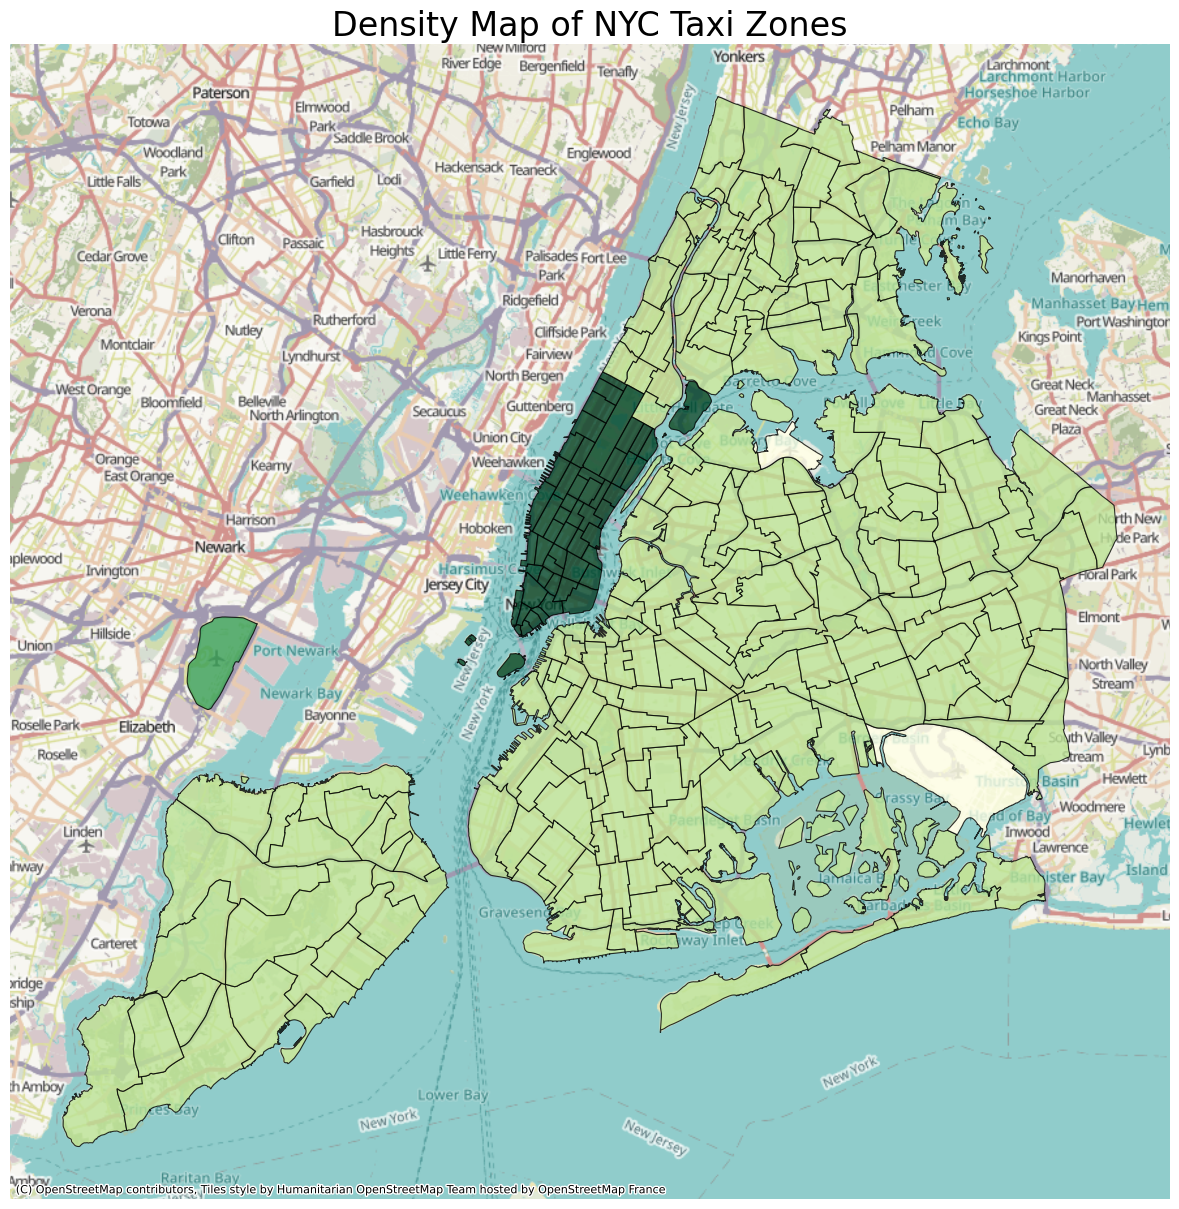

In [26]:
gdf = pd.merge(gdf, taxi_zones, how="left", left_on="LocationID", right_on="LocationID")
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf.plot(
    column='service_zone',  # The column to use for coloring
    cmap='YlGn',     # Color map (e.g., OrRd, Blues, Viridis)
    linewidth=0.8,   # Line width for boundaries
    edgecolor='k',   # Boundary color
    alpha=0.8,       # Transparency
    ax=ax
)

# Add a basemap
ctx.add_basemap(
    ax,
    # CRS definition (without the line below, the map is incorrect)
    crs=gdf.crs.to_string(),
)


# Customize the plot
ax.set_axis_off()  # Remove axes
ax.set(title='Map of NYC Taxi Zones')
ax.title.set_size(24)

plt.show()